In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
col = ['k', 'b', 'r', 'g', 'tab:orange', 'm']
mar = ['o', '^', 'v', 's', 'D']

import RPDM

In [26]:
Temp = 450
L_bl = 7 * 10**(-6)
A_bl = 2 * 10**(-10) * 0.01
b_2 = -4011 * 100
V = 0.56
d_dl = 1 * 10**(-9)
C_bl = 10**(-13)
M_FeCr2O4 = 224 * 0.001
M_O = 16 * 0.001
rho_FeCr2O4 = 4.8 * 1000
e = 1.6 * 10**(-19)
k = 1.38 * 10**(-23)

Om = M_O/rho_FeCr2O4
delta_phi = 0.01 * V
delta_phi_2 = V * d_dl/L_bl

print(Om, -b_2*L_bl, 2*e*delta_phi/k/Temp, 2*e*delta_phi_2/k/Temp)
print(A_bl * np.exp(b_2*L_bl))
k2_0 = A_bl/Om*np.exp(b_2*L_bl - 2*e*delta_phi_2/k/Temp)
print(k2_0)
print(Om*k2_0, C_bl)

3.3333333333333333e-06 2.8077 0.2885668276972626 0.004122383252818038
1.206872464784736e-13
3.6057225440771665e-08
1.201907514692389e-13 1e-13


In [38]:
Ff = 96485
e_0 = 8.85 * 10**(-12)
R = 8.314
Temp = 293
A_k = 10**(-8)
A_D = 10**(-18)
A_L = 10**(-6)

an = 0.1
e_f = 10
e_dl = 10
e_cdl = 78.5
d_dl = 1e-3
d_cdl = 1e-3
D_MV = 1
D_OV = 1
k1_0 = 5 * 100   # reactive
k2_0 = 4
k3_0 = 4
k4_0 = 5 * 100   # reactive
k5_0 = C_bl/Om
k5 = k5_0

A_C = A_k*A_L/A_D
A_t = A_L**2/A_D
A_phi = R*Temp/Ff
phi_ext = 0.56/A_phi

print(f'{A_C:.3f}, {A_t:.3f}, {A_phi:.4f}')

L = 7
T = 1
Nx = 201
n_save = 10

h = L / (Nx-1)
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2) + 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)

id = 1
path = f'data_2/L_{k2_0:.1f}_{phi_ext*A_phi:.1f}_{id}/'
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

10000.000, 1000000.000, 0.0252
201 3267 328


In [39]:
F = RPDM.Film()

F.Nx = Nx
F.n_save = n_save
F.phi_ext = phi_ext
F.L = L
F.T = T
F.D_MV = D_MV
F.D_OV = D_OV
F.k1_0 = k1_0
F.k2_0 = k2_0
F.k3_0 = k3_0
F.k4_0 = k4_0
F.k5_0 = k5_0
F.an = an
F.e_f = e_f
F.e_dl = e_dl
F.e_cdl = e_cdl
F.d_dl = d_dl
F.d_cdl = d_cdl
F.Temp = Temp
F.Ff = Ff
F.e_0 = e_0
F.R = R
F.A_k = A_k
F.A_D = A_D
F.A_L = A_L

F.start()

25

In [40]:
F.solve()

0

In [41]:
F.save_x(path.encode())
F.save_t(path.encode())
F.save_C_MV(path.encode())
F.save_C_OV(path.encode())
F.save_phi(path.encode())
F.save_E(path.encode())
F.save_k2(path.encode())

In [42]:
x = np.loadtxt(path+'/x.txt')
t_data = np.loadtxt(path+'/t_data.txt')
Data_C_MV = np.loadtxt(path+'/Data_C_MV.txt')
Data_C_OV = np.loadtxt(path+'/Data_C_OV.txt')
Data_phi = np.loadtxt(path+'/Data_phi.txt')
Data_E = np.loadtxt(path+'/Data_E.txt')
Data_k2 = np.loadtxt(path+'/Data_k2.txt')

ValueError: could not convert string to float: '-nan(ind)'

In [31]:
def calc_L_phi(phi_ext, L_b, L_e, dL, h, path, err_0_k=1e-6, show=0):   
    
    F = RPDM.Film()

    F.D_MV = D_MV
    F.D_OV = D_OV
    F.k1_0 = k1_0
    F.k2_0 = k2_0
    F.k3_0 = k3_0
    F.k4_0 = k4_0
    F.k5_0 = k5_0
    F.an = an
    F.e_f = e_f
    F.e_dl = e_dl
    F.e_cdl = e_cdl
    F.d_dl = d_dl
    F.d_cdl = d_cdl
    F.Temp = Temp
    F.Ff = Ff
    F.e_0 = e_0
    F.R = R
    F.A_k = A_k
    F.A_D = A_D
    F.A_L = A_L
    F.n_save = n_save
    
    F.phi_ext = phi_ext

    
    L_arr = np.arange(L_b, L_e+dL, dL)
    N_L = len(L_arr)
    print(N_L)
    
    K2 = np.zeros(N_L)
    for i in range(N_L):
        show2 = show
        
        F.Nx = round(L_arr[i]/h) + 1
        F.L = L_arr[i]
        F.T = T
        
        F.start()
        F.solve()
        F.save_k2(path.encode())

        Data_k2 = np.loadtxt(path+'/Data_k2.txt')
        b = - (F.Ndata // 2)
        k2_mean = np.mean(Data_k2[b:])
        err_k = np.std(Data_k2[b:])/k2_mean
        if err_k > err_0_k:
            b = (b // 2)
            k2_mean = np.mean(Data_k2[b:])
            err_k = np.std(Data_k2[b:])/k2_mean
            if err_k > err_0_k:
                b = (b // 2)
                k2_mean = np.mean(Data_k2[b:])
                err_k = np.std(Data_k2[b:])/k2_mean
                if err_k > err_0_k:
                    print(f"Didn't converge on step {i}")
                    show2 = 1
        K2[i] = k2_mean
        #print(i+1)
    I = np.argmin(np.abs(K2 - k5))
    if I == 0:
        print(f'WARNING: Relax L is close to lower bound {L_b*0.1:.1f} нм')
    elif I == N_L - 1:
        print(f'WARNING: Relax L is close to upper bound {L_e*0.1:.1f} нм')
    return L_arr, K2, L_arr[np.argmin(np.abs(K2 - k5_0*0.01))]

# Calculating L at various $\phi_{ext}$

## $\phi_{ext}$ = 0.3 V

In [28]:
id = 2

phi_ext = 0.3/A_phi

L_b = 6
L_e = 7
h = 0.05
dL = 2*h

T = 10
Ndata = 800


Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
path = f'data/L_{k2_0:.1f}_{phi_ext*A_phi:.1f}_{id}/'
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

121 16001 802
11


In [29]:
L_arr, K2, L_relax = calc_L_phi(phi_ext, L_b, L_e, dL, h, path)

11
1
2
3
4
5
6
7
8
9
10
11


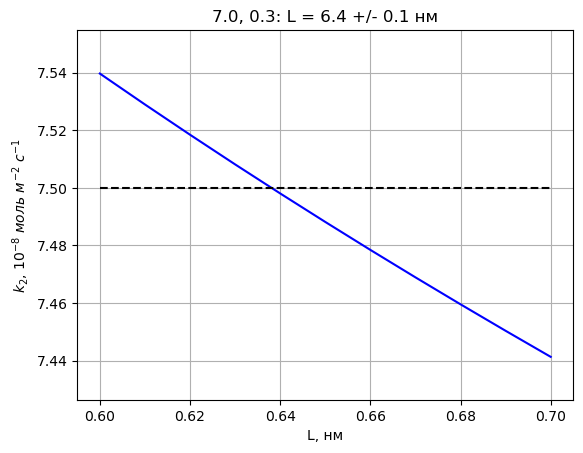

In [30]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr*0.1, K2, 'b')
plt.plot([L_arr[0]*0.1, L_arr[-1]*0.1], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'{k2_0:.1f}, {phi_ext*A_phi:.1f}: L = {L_relax:.1f} +/- {dL:.1f} нм')
plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $\phi_{ext}$ = 0.5 V

In [36]:
id = 1

phi_ext = 0.5/A_phi

L_b = 10
L_e = 11
h = L_b/200
dL = 2*h

T = 20
Ndata = 800


Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
path = f'data/L_{k2_0:.1f}_{phi_ext*A_phi:.1f}_{id}/'
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

201 32001 802
11


In [37]:
L_arr, K2, L_relax = calc_L_phi(phi_ext, L_b, L_e, dL, h, path)

11


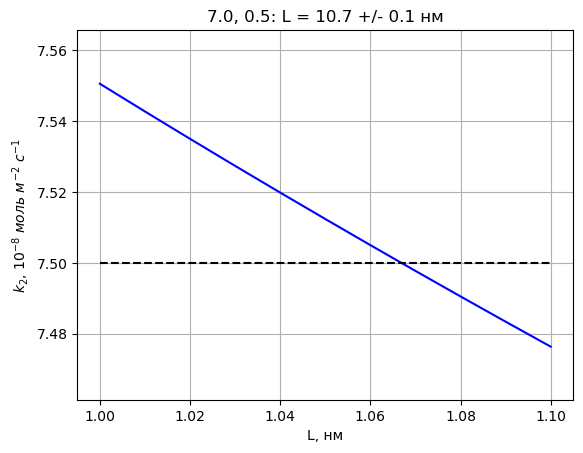

In [38]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr*0.1, K2, 'b')
plt.plot([L_arr[0]*0.1, L_arr[-1]*0.1], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'{k2_0:.1f}, {phi_ext*A_phi:.1f}: L = {L_relax:.1f} +/- {dL:.1f} нм')
plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $\phi_{ext}$ = 1.0 V

In [64]:
id = 1

phi_ext = 1.0/A_phi

L_b = 19
L_e = 21
h = L_b/200
dL = 5*h

T = 40
Ndata = 800


Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
path = f'data/L_{k2_0:.1f}_{phi_ext*A_phi:.1f}_{id}/'
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

201 17730 807
6


In [65]:
L_arr, K2, L_relax = calc_L_phi(phi_ext, L_b, L_e, dL, h, path)

6


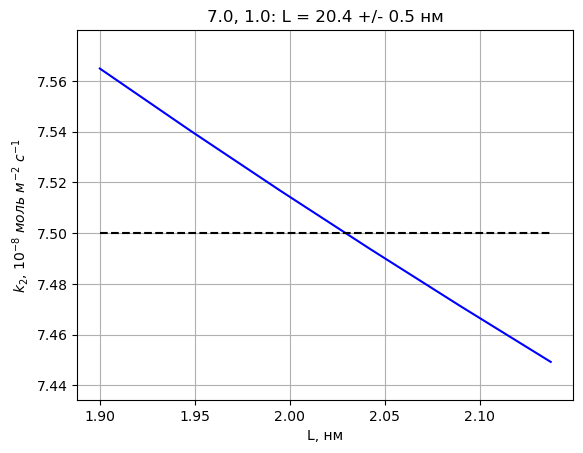

In [66]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))

plt.plot(L_arr*0.1, K2, 'b')
plt.plot([L_arr[0]*0.1, L_arr[-1]*0.1], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'{k2_0:.1f}, {phi_ext*A_phi:.1f}: L = {L_relax:.1f} +/- {dL:.1f} нм')
plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $\phi_{ext}$ = 1.5 V

In [60]:
id = 1

phi_ext = 1.5/A_phi

L_b = 28
L_e = 30
h = L_b/200
dL = 2*h

T = 90
Ndata = 800


Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
path = f'data/L_{k2_0:.1f}_{phi_ext*A_phi:.1f}_{id}/'
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

201 18369 800
9


In [61]:
L_arr, K2, L_relax = calc_L_phi(phi_ext, L_b, L_e, dL, h, path)

9


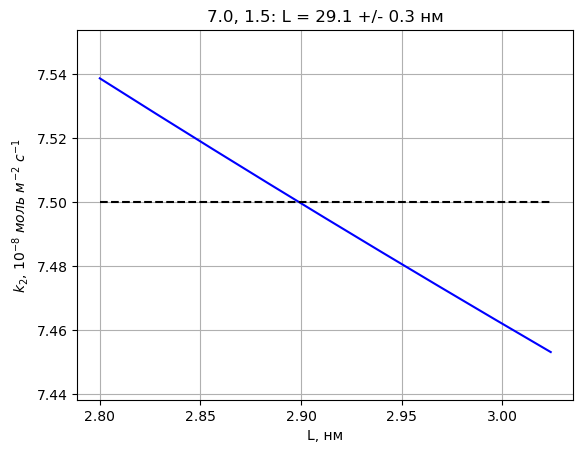

In [62]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))

plt.plot(L_arr*0.1, K2, 'b')
plt.plot([L_arr[0]*0.1, L_arr[-1]*0.1], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'{k2_0:.1f}, {phi_ext*A_phi:.1f}: L = {L_relax:.1f} +/- {dL:.1f} нм')
plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

 # Dependence of L on $\phi_{ext}$

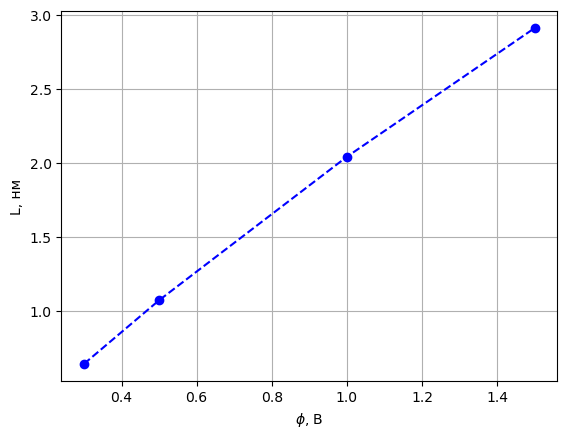

In [63]:
Phi_ext = np.array([0.3, 0.5, 1.0, 1.5])
L_relax_arr = np.array([6.4, 10.7, 20.4, 29.1])

plt.plot(Phi_ext, L_relax_arr*0.1, 'bo')
plt.plot(Phi_ext, L_relax_arr*0.1, 'b--')
plt.xlabel(r'$\phi$, В')
plt.ylabel('L, нм')
plt.grid()
plt.show()